In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load global step csv to convert from update number to steps
global_step_csv = pd.read_csv("wandb_export_2024-04-22T15_41_48.838-05_00.csv")
global_step_csv.head()

,Step,CartPole_siglip-base-patch16-224k_contrastive_20240422_052816 - global_step,CartPole_siglip-base-patch16-224k_contrastive_20240422_052816 - global_step__MIN,CartPole_siglip-base-patch16-224k_contrastive_20240422_052816 - global_step__MAX,CartPole_CLIP_contrastive_20240421_204807 - global_step,CartPole_CLIP_contrastive_20240421_204807 - global_step__MIN,CartPole_CLIP_contrastive_20240421_204807 - global_step__MAX,MountainCarContinuous_CLIP_goal_baseline_reg_20240420_044224 - global_step,MountainCarContinuous_CLIP_goal_baseline_reg_20240420_044224 - global_step__MIN,MountainCarContinuous_CLIP_goal_baseline_reg_20240420_044224 - global_step__MAX,MountainCarContinuous_CLIP_goal_baseline_reg_20240419_004540 - global_step,MountainCarContinuous_CLIP_goal_baseline_reg_20240419_004540 - global_step__MIN,MountainCarContinuous_CLIP_goal_baseline_reg_20240419_004540 - global_step__MAX
0,0,75200,75200,75200,75200,75200,75200,1600.0,1600.0,1600.0,11200.0,11200.0,11200.0
1,1,76800,76800,76800,76800,76800,76800,3200.0,3200.0,3200.0,12800.0,12800.0,12800.0
2,2,78400,78400,78400,78400,78400,78400,4800.0,4800.0,4800.0,14400.0,14400.0,14400.0
3,3,80000,80000,80000,80000,80000,80000,6400.0,6400.0,6400.0,16000.0,16000.0,16000.0
4,4,81600,81600,81600,81600,81600,81600,8000.0,8000.0,8000.0,17600.0,17600.0,17600.0


In [3]:
#load in reward csv
reward_csv = pd.read_csv("wandb_export_2024-04-22T15_12_08.207-05_00.csv")
reward_csv.head()

,Step,CartPole_siglip-base-patch16-224k_contrastive_20240422_052816 - rollout/ep_gt_rew_mean,CartPole_siglip-base-patch16-224k_contrastive_20240422_052816 - rollout/ep_gt_rew_mean__MIN,CartPole_siglip-base-patch16-224k_contrastive_20240422_052816 - rollout/ep_gt_rew_mean__MAX,CartPole_CLIP_contrastive_20240421_204807 - rollout/ep_gt_rew_mean,CartPole_CLIP_contrastive_20240421_204807 - rollout/ep_gt_rew_mean__MIN,CartPole_CLIP_contrastive_20240421_204807 - rollout/ep_gt_rew_mean__MAX,MountainCarContinuous_CLIP_goal_baseline_reg_20240420_044224 - rollout/ep_gt_rew_mean,MountainCarContinuous_CLIP_goal_baseline_reg_20240420_044224 - rollout/ep_gt_rew_mean__MIN,MountainCarContinuous_CLIP_goal_baseline_reg_20240420_044224 - rollout/ep_gt_rew_mean__MAX,MountainCarContinuous_CLIP_goal_baseline_reg_20240419_004540 - rollout/ep_gt_rew_mean,MountainCarContinuous_CLIP_goal_baseline_reg_20240419_004540 - rollout/ep_gt_rew_mean__MIN,MountainCarContinuous_CLIP_goal_baseline_reg_20240419_004540 - rollout/ep_gt_rew_mean__MAX
0,0,30.962767,30.962767,30.962767,30.962767,30.962767,30.962767,-7.535482,-7.535482,-7.535482,-6.745761,-6.745761,-6.745761
1,1,30.672873,30.672873,30.672873,30.664894,30.664894,30.664894,-6.470004,-6.470004,-6.470004,-6.751451,-6.751451,-6.751451
2,2,30.507978,30.507978,30.507978,30.468084,30.468084,30.468084,-6.244577,-6.244577,-6.244577,-6.901341,-6.901341,-6.901341
3,3,30.494680,30.494680,30.494680,30.404255,30.404255,30.404255,-6.740314,-6.740314,-6.740314,-7.017200,-7.017200,-7.017200
4,4,30.476065,30.476065,30.476065,30.380320,30.380320,30.380320,-7.136339,-7.136339,-7.136339,-7.160112,-7.160112,-7.160112


In [4]:
#make step equal to global step
reward_csv["Step"] = global_step_csv[global_step_csv.columns[1]]

In [13]:
#readable columns, min, max, and mean will be the same, technically can throw away min/max
reward_csv.columns = ["Step", "Siglip_1_mean", "Siglip_1_min", "Siglip_1_max", "Siglip_2_mean", "Siglip_2_min", "Siglip_2_max",
                     "CLIP_1_mean", "CLIP_1_min", "CLIP_1_max", "CLIP_2_mean", "CLIP_2_min", "CLIP_2_max",]

In [14]:
def moving_window_average(data, window_size):
    """Smooth data with moving window average."""
    if window_size <= 1:
        return data
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'same')

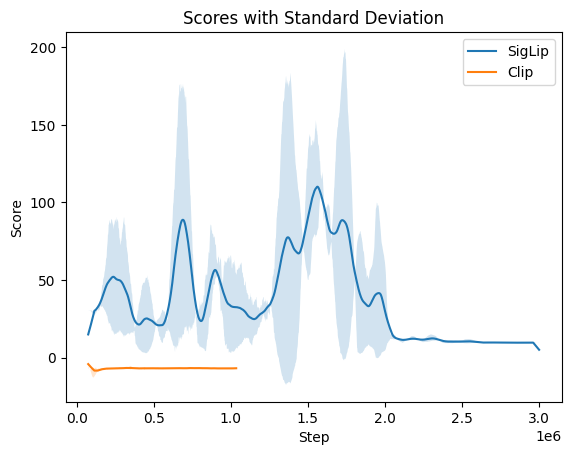

In [17]:
# Calculate means and standard deviations over the groups
siglip_means = reward_csv[['Siglip_1_mean', 'Siglip_2_mean']].mean(axis=1)
siglip_stds = reward_csv[['Siglip_1_mean', 'Siglip_2_mean']].std(axis=1)

clip_means = reward_csv[['CLIP_1_mean', 'CLIP_2_mean']].mean(axis=1)
clip_stds = reward_csv[['CLIP_1_mean', 'CLIP_2_mean']].std(axis=1)


# Define smooth factor (window size), where the window size is 2k+1
smooth_factor = 50

# Apply smoothing
smoothed_siglip_means = moving_window_average(siglip_means, smooth_factor)
smoothed_clip_means = moving_window_average(clip_means, smooth_factor)

# Plot the means
plt.plot(reward_csv['Step'], smoothed_siglip_means, label='SigLip')
plt.plot(reward_csv['Step'], smoothed_clip_means, label='Clip')
# Fill between mean ± std
plt.fill_between(reward_csv['Step'], siglip_means-siglip_stds, siglip_means+siglip_stds, alpha=0.2)
plt.fill_between(reward_csv['Step'], clip_means-clip_stds, clip_means+clip_stds, alpha=0.2)

# Labeling the plot
plt.xlabel('Step')
plt.ylabel('Score')
plt.title('Scores with Standard Deviation')
plt.legend()
plt.show()
